# User params

In [1]:
max_samples = 1_000

# Outlier detection with PyOD


In [2]:

import os, sys
sys.path.append(os.path.abspath('../src'))
from src.config import BASE_PATH_DATA, PATH_PROJECT
os.chdir(PATH_PROJECT)

In [8]:
import numpy as np
from src.utils.io import load_dataframe
from src.tasks.outliers import outlier_prediction
from src.config import BASE_PATH_DATA

# load data
file_path_train_encoded = os.path.join(BASE_PATH_DATA, 'processed', f'df_train_encoded{max_samples}.parquet')
file_path_test_encoded = os.path.join(BASE_PATH_DATA, 'processed', f'df_test_encoded{max_samples}.parquet')
train_df = load_dataframe(file_path_train_encoded)
test_df = load_dataframe(file_path_test_encoded)

# train and inference
outliers_train, scores_train = outlier_prediction(train_df, training=True)
outliers_test, scores_test = outlier_prediction(test_df, training=False) 

# categorize samples
train_scores_inliers = scores_train[outliers_train==0]
train_scores_outliers = scores_train[outliers_train==1]

test_scores_inliers = scores_test[outliers_test==0]
test_scores_outliers = scores_test[outliers_test==1]

# Calculate average outlier scores for train and test sets
average_score_inlier_train = np.mean(train_scores_inliers)
average_score_outlier_train = np.mean(train_scores_outliers)

average_score_inlier_test = np.mean(test_scores_inliers)
average_score_outlier_test = np.mean(test_scores_outliers)


2024-08-01 14:44:10,057 - src.config - DEBUG - calling load_dataframe
2024-08-01 14:44:10,058 - src.config - INFO - Current working directory: C:\Users\alexi\WORKSPACE\interview_abwaab\ReviewOutliers
2024-08-01 14:44:10,152 - src.config - DEBUG - calling load_dataframe
2024-08-01 14:44:10,153 - src.config - INFO - Current working directory: C:\Users\alexi\WORKSPACE\interview_abwaab\ReviewOutliers
2024-08-01 14:44:10,236 - src.config - DEBUG - calling outlier_prediction
c:\Users\alexi\AppData\Local\pypoetry\Cache\virtualenvs\reviewoutliers-SwZO3ms--py3.12\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
2024-08-01 14:44:10,424 - src.config - DEBUG - calling outlier_prediction
c:\Users\alexi\AppData\Local\pypoetry\Cache\virtualenvs\reviewoutliers-SwZO3ms--py3.12\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warning

# Visualizations

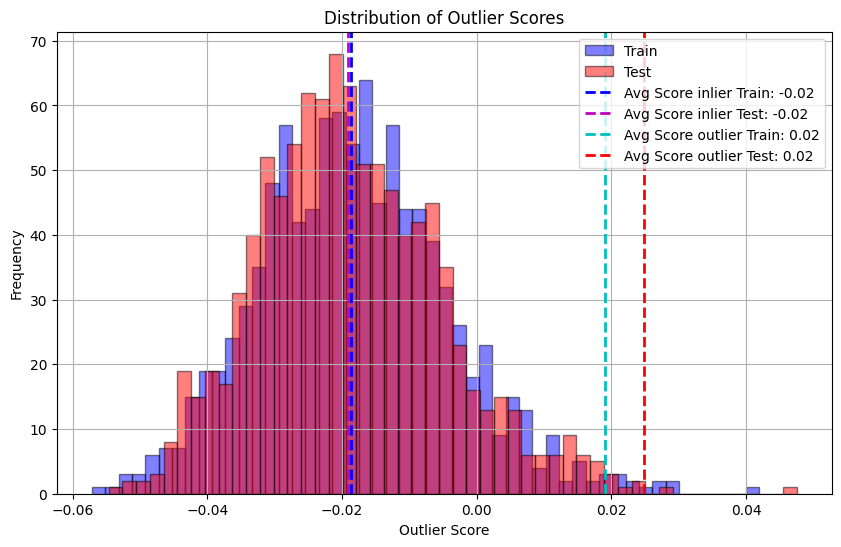

In [10]:
import matplotlib.pyplot as plt

# Plotting the histogram of outlier scores for train and test sets
plt.figure(figsize=(10, 6))
plt.hist(scores_train, bins=50, alpha=0.5, color='blue', edgecolor='black', label='Train')
plt.hist(scores_test, bins=50, alpha=0.5, color='red', edgecolor='black', label='Test')

plt.axvline(average_score_inlier_train, color='b', linestyle='dashed', linewidth=2, label=f'Avg Score inlier Train: {average_score_inlier_train:.2f}')
plt.axvline(average_score_inlier_test, color='m', linestyle='dashed', linewidth=2, label=f'Avg Score inlier Test: {average_score_inlier_test:.2f}')

plt.axvline(average_score_outlier_train, color='c', linestyle='dashed', linewidth=2, label=f'Avg Score outlier Train: {average_score_outlier_train:.2f}')
plt.axvline(average_score_outlier_test, color='r', linestyle='dashed', linewidth=2, label=f'Avg Score outlier Test: {average_score_outlier_test:.2f}')

plt.title('Distribution of Outlier Scores')
plt.xlabel('Outlier Score')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [12]:
from src.tasks.distribution_shift import distribution_shift_scoring
ks_score_train = distribution_shift_scoring(scores_train, train_scores_outliers, method='ks')
ks_score_test = distribution_shift_scoring(scores_train, test_scores_outliers, method='ks')

psi_score_train = distribution_shift_scoring(scores_train, train_scores_outliers, method='psi')
psi_score_test = distribution_shift_scoring(scores_train, test_scores_outliers, method='psi')

print(f'KS Score - Train: {ks_score_train:.2f}, Test: {ks_score_test:.2f}, (higher is more different)')
print(f'PSI Score - Train: {psi_score_train:.2f}, Test: {psi_score_test:.2f}, (higher is more different)')

2024-08-01 14:45:27,660 - src.config - DEBUG - calling distribution_shift_scoring
2024-08-01 14:45:27,662 - src.config - DEBUG - calling distribution_shift_scoring
2024-08-01 14:45:27,665 - src.config - DEBUG - calling distribution_shift_scoring
2024-08-01 14:45:27,667 - src.config - DEBUG - calling distribution_shift_scoring


KS Score - Train: 0.92, Test: 0.99, (higher is more different)
PSI Score - Train: 18.41, Test: 15.87, (higher is more different)
